# Choose Your Major, Choose Your Paycheck

# Overview


This project explores which factor, among major, college quality, gender, and intership experience, is most influential to the starting salary of college graduates in the US. Data were collected and cleaned from online datasets, and analyzed using linear regression. The influence of each factor is represented by the R-squared of each regression model, as a larger R--squared indicates the ability to explain more variability in the starting salary outcome. The results show that major is the most influential factor among the four, although the influence of other factors cannot be ruled out due to limitations like the data for each factor come from separate datasets.

# Names


- Moyu Lyu
- Catherine Ma
- Ka Lam Wong
- Chen Yang
- Zhe Mo

<a id='research_question'></a>
# Research Question

Which factor, among major, college quality, internship experience, and gender, is the most influential on the starting salary of college graduates in the United States?

## Background & Prior Work

As college students, we cannot avoid thinking about our next step. If we decide to apply for jobs after receiving our bachelor’s degree, an important point to consider is what would help us get a higher starting salary for our first job. Is our destiny determined at birth with our gender, or at the start of college by our choice of university and major? Or do we still have a grasp on our fate as factors like internship experience that are more influential to our starting salary? This project tries to answer these questions by looking into datasets of starting salaries for college graduates and to seek potential connections between the starting salary with the four factors mentioned above (gender, college quality, major, and internship experience).

Previous works, old and new, have been done on similar topics, using various kinds of experiments and modeling. In 1993, Rumberger and Thomas utilized hierarchical linear modeling(HLM) and ordinary least-squares(OLS) regression to estimate the impact of college major, school quality, and educational performance on the earnings of college graduates. The study involved two types of data: the individual data from the 1987 RCG and school-level data from ASC for 1985-1986. The research results show that college major had an important impact on earnings for both men and women, college performance only influenced the earnings of women, and College quality essentially contributed to the different average earnings of all graduates except engineering. This research has limitations since it focused on the impact of qualitative factors on initial salaries without considering the later salaries. Thomas and Zhang continued further research to examine the impact of college quality and academic major on the wage growth of college graduates. They did data analysis on data from individual college graduates and data from the colleges conferring their degrees. The results show that college quality and academic major play roles in wage growth. These two researches indicate the essential effect of academic major and college quality on the graduates’ salary. 

However, more recent studies publish some conflicting findings. Nunley et al. designed an experiment to test the effect of majors and internship experiences on applying for business-related jobs. They sent out nearly ten thousand pieces of randomly generated résumé to companies and corporations, and gained a shocking result: how successful college graduates are in finding jobs does not seem to be related to their choice of major. There is no significant difference between a résumé from a business-unrelated major graduate and that from a business-related major graduate. The only factor that mattered seems to be whether they had industry-relevant internship experiences.

While these papers provide insight for our group’s topic, the datasets involved in the studies are outdated, and they fail to report a consistent result. Therefore, there is more to be explored about this topic, and our proposal aims to solve this question using more up-to-date datasets and analytical tools.

**References (include links):**
  1. https://link.springer.com/article/10.1007%2Fs11162-005-2969-y
  2. https://www.sciencedirect.com/science/article/pii/027277579390040N
  3. https://www.sciencedirect.com/science/article/pii/S0927537115001207


# Hypothesis

We predict that major will be the most influential among the four factors since the population of graduate students from certain majors like Engineering and Computer Science cannot satisfy the enormous industrial need, resulting in an imbalance between the number of graduates and availability of corresponding jobs. In order to attract high-ended graduates, the industry will offer a higher salary to graduates in those majors.

# Dataset(s)

Dataset Name: Where it Pays to Attend College
- Link to the dataset: https://www.kaggle.com/wsj/college-salaries
- Number of observations:We will use the degrees-that-pay-back.csv which has 50 observations and salaries-by-college-type.csv which has 269 observations.
- Description:The data in degrees-that-pay-back.csv are collected by PayScale Inc, it includes undergraduate major, starting median salary, and other periodic salary during the career. Related article, "Ivy Leaguers' Big Edge: Starting Pay" by Sarah E. Needleman : https://www.wsj.com/articles/SB121746658635199271). 



Dataset Name: World University Rankings
- Link to the dataset: https://www.kaggle.com/mylesoneill/world-university-rankings   
- Number of observations:We will use timesData.csv which has 2603 obeservations
- Description: The timesData.csv includes world ranks with relative scores for different universities and their information like country and num of students. 



Dataset Name: Campus Recruitment
- Link to the dataset: https://www.kaggle.com/benroshan/factors-affecting-campus-placement
- Number of observations:The are 215 oberservations in the dataset. 
- Description: This data set consists of Placement data of students in an anonymous campus. It includes secondary and higher secondary school percentage and specialization. It also includes gender, degree specialization, type and work experience and salary offers to the placed students.

Additional Information: We will merge the timesData.csv from World University Rankings with the salaries-by-college-type.csv from Where it Pays to Attend College into a single dataset for analyzing the effect of college quality on starting salary. We will use the degrees-that-pay-back.csv from the first dataset to analyze the effect of major and Placement_Data_Full_Class.csv from the third dataset to analyze the effect of gender and internship experience.  

# Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
get_ipython().magic('matplotlib inline')
import seaborn as sns
from scipy import stats
import patsy
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')
import re

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# read raw files
major= pd.read_csv('degrees-that-pay-back.csv')

college_type = pd.read_csv('salaries-by-college-type.csv')
college_rank = pd.read_csv('timesData.csv')

gender = pd.read_csv('Placement_Data_Full_Class.csv')

Look at the uncleaned dataframes. 

In [ ]:
major.head()

,Undergraduate Major,Starting Median Salary,Mid-Career Median Salary,Percent change from Starting to Mid-Career Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
0,Accounting,"$46,000.00","$77,100.00",67.6,"$42,200.00","$56,100.00","$108,000.00","$152,000.00"
1,Aerospace Engineering,"$57,700.00","$101,000.00",75.0,"$64,300.00","$82,100.00","$127,000.00","$161,000.00"
2,Agriculture,"$42,600.00","$71,900.00",68.8,"$36,300.00","$52,100.00","$96,300.00","$150,000.00"
3,Anthropology,"$36,800.00","$61,500.00",67.1,"$33,800.00","$45,500.00","$89,300.00","$138,000.00"
4,Architecture,"$41,600.00","$76,800.00",84.6,"$50,600.00","$62,200.00","$97,000.00","$136,000.00"


In [ ]:
college_type.head()

,School Name,School Type,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
0,Massachusetts Institute of Technology (MIT),Engineering,"$72,200.00","$126,000.00","$76,800.00","$99,200.00","$168,000.00","$220,000.00"
1,California Institute of Technology (CIT),Engineering,"$75,500.00","$123,000.00",NaN,"$104,000.00","$161,000.00",NaN
2,Harvey Mudd College,Engineering,"$71,800.00","$122,000.00",NaN,"$96,000.00","$180,000.00",NaN
3,"Polytechnic University of New York, Brooklyn",Engineering,"$62,400.00","$114,000.00","$66,800.00","$94,300.00","$143,000.00","$190,000.00"
4,Cooper Union,Engineering,"$62,200.00","$114,000.00",NaN,"$80,200.00","$142,000.00",NaN


In [ ]:
college_rank.head()

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
0,1,Harvard University,United States of America,99.7,72.4,98.7,98.8,34.5,96.1,"20,152",8.9,25%,NaN,2011
1,2,California Institute of Technology,United States of America,97.7,54.6,98.0,99.9,83.7,96.0,"2,243",6.9,27%,33 : 67,2011
2,3,Massachusetts Institute of Technology,United States of America,97.8,82.3,91.4,99.9,87.5,95.6,"11,074",9.0,33%,37 : 63,2011
3,4,Stanford University,United States of America,98.3,29.5,98.1,99.2,64.3,94.3,"15,596",7.8,22%,42 : 58,2011
4,5,Princeton University,United States of America,90.9,70.3,95.4,99.9,-,94.2,"7,929",8.4,27%,45 : 55,2011


In [ ]:
gender.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


# Data Cleaning

###Major

To determine the majors that have higher starting salaries, we remove the 
columns that are unrelated to our research question from the original dataset like the mid-career salary. Then, we rename the columns using simpler terms and display the majors that have the highest starting median salary by ranking them from the highest to the lowest. Finally, we change the type of the salary column from objects into integers in order to analyze them quantitatively, and reset the index so the first row would be indexed as 0:


In [8]:
#keep only the necessary columns in major
major = major[['Undergraduate Major','Starting Median Salary']]

In [9]:
#check for NaN
major['Starting Median Salary'].hasnans

False

In [10]:
#check the type
major.dtypes

Undergraduate Major       object
Starting Median Salary    object
dtype: object

In [11]:
#change salary to int 
def int_salary(salary):
  return int(salary.strip("$").split('.')[0].replace(',',''))

In [12]:
#Change salary to int in major 
major = major.set_axis(['major','salary'], axis = 'columns')
major.salary = major.salary.apply(int_salary)

In [13]:
#sort values of salary
major = major.sort_values(by=['salary'],ascending=False).reset_index(drop=True)
major.head()

,major,salary
0,Physician Assistant,74300
1,Chemical Engineering,63200
2,Computer Engineering,61400
3,Electrical Engineering,60900
4,Mechanical Engineering,57900


After that, we try to categorize the different majors into 5 groups: Math & Science, Arts, Social Sci/Lit/Lang, Business, and Engineering & Tech by applying the function and store them into a new column named "type" which could be useful for future analysis (we classify the major based on our own perspective and use the article "College Majors by Type: Arts, STEM, Business, and More" written by Jackie Burrell as a reference: https://www.thebalancecareers.com/choosing-a-college-major-by-field-3570279
,the major type for each major might vary from different universities):

In [14]:
#categorize the type of the majors
engr_tech= ['Chemical Engineering','Computer Engineering', 'Electrical Engineering',
       'Mechanical Engineering', 'Aerospace Engineering',
       'Industrial Engineering', 'Computer Science','Civil Engineering',
      'Management Information Systems (MIS)', 'Information Technology (IT)']

math_sci = ['Physician Assistant','Nursing','Construction', 'Physics',
            'Math','Geology', 'Agriculture', 'Chemistry',
            'Nutrition','Forestry','Biology']

bus= ['Finance', 'Accounting','Business Management','Marketing']

lang_SocSci= ['Criminal Justice', 'Education', 'Religion', 'Spanish',
          'Anthropology', 'Sociology','Psychology', 'Communications', 'English',
          'Hospitality & Tourism', 'Journalism', 'Health Care Administration',
          'History','Political Science','Philosophy', 'International Relations','Geography','Economics']

art =  ['Music', 'Drama', 'Art History', 'Graphic Design',
        'Interior Design','Film','Architecture']

In [15]:
#function to categorize major 
def standardize_major(string):   
   
    if string in math_sci:
        output = 'Math & Sci'
    elif string in engr_tech:
        output = 'Engineering & Tech'
    elif string in bus:
        output = 'Business'
    elif string in lang_SocSci:
        output = 'Social Sci/Lit/Lang'  
    elif string in art:
        output = 'Arts'
    else:
        output = string
    
    return output

In [16]:
#apply the function into a new column
major['type'] = major['major'].apply(standardize_major)

In [17]:
#re-order the columns
major = major[['major','type', 'salary']]
major.head()

,major,type,salary
0,Physician Assistant,Math & Sci,74300
1,Chemical Engineering,Engineering & Tech,63200
2,Computer Engineering,Engineering & Tech,61400
3,Electrical Engineering,Engineering & Tech,60900
4,Mechanical Engineering,Engineering & Tech,57900


###College Quality

To determine how college quality can affect starting salary, we pull data from two datasets: college_type and college_rank. college_type contains information about universities and their corresponding starting median salary. college_rank has information about the world rank of universities. We first keep the columns relevant to our research question and rename them. After that, we check if there is any missing value in these datasets. Then we write a function to standardize the strings for the names of the universities. Finally, we perform an inner merge on the two dataset, sort it by descending value in salary, and reset the index.

In [ ]:
# keep only the necessary columns in college_type
college_df = college_type[['School Name', 'Starting Median Salary']]

# rename columns
college_df = college_df.rename(columns = {'School Name': 'name', 'Starting Median Salary': 'salary'})

# keep only the necessary columns in college_rank
rank_df = college_rank[['world_rank', 'university_name']]

# only include the most comprehensive ranking (only run this cell once)
comprehensive_rank_df = rank_df.iloc[1803 : -1, : ]
comprehensive_rank_df.head()

# rename columns
comprehensive_rank_df = comprehensive_rank_df.rename(columns = {'university_name': 'name', 'world_rank': 'rank'})

# making the ranks more exact
comprehensive_rank_df = comprehensive_rank_df.reset_index(drop=True)
comprehensive_rank_df['index1'] = comprehensive_rank_df.index
comprehensive_rank_df = comprehensive_rank_df.assign(exact_rank = comprehensive_rank_df['index1'] + 1)
exact_rank_df = comprehensive_rank_df[['name', 'exact_rank']]
exact_rank_df = exact_rank_df.rename(columns = {'name': 'name', 'exact_rank': 'rank'})

In [ ]:
# check for nans
print(college_df['name'].hasnans,
      college_df['salary'].hasnans,
      exact_rank_df['name'].hasnans,
      exact_rank_df['rank'].hasnans)

False False False False


In [ ]:
# standardize college names
def standardize_name(string):
    
    # remove things in parentheses
    string = re.sub(r"\([^()]*\)", "", string)
    
    #all lowercase 
    string = string.lower()
    string = string.strip()
    
    #remove punctuation marks and 
    string = string.replace(",", "")
    string = string.replace("at", "")
    
    output = string.strip()
    
    return output

In [ ]:
# apply function to college_df
pd.options.mode.chained_assignment = None
college_df['name'] = college_df['name'].apply(standardize_name)

# apply function to exact_rank_df
pd.options.mode.chained_assignment = None
exact_rank_df['name'] = exact_rank_df['name'].apply(standardize_name)

In [ ]:
# merge college_df and comprehensive_rank_df
quality = pd.merge(college_df, exact_rank_df, on='name')

In [ ]:
#change salary in quality to integer 
quality.salary = quality.salary.apply(int_salary)

In [ ]:
# sort by values in salary and reset the index
quality = quality.sort_values(by = ['salary'], ascending = False).reset_index(drop=True)
quality

,name,salary,rank
0,california institute of technology,75500,1
1,massachusetts institute of technology,72200,5
2,princeton university,66500,7
3,harvard university,63400,6
4,carnegie mellon university,61800,22
...,...,...,...
85,university of new mexico,41600,375
86,university of south florida,41100,238
87,university of south carolina,40000,384
88,kent ste university,38700,540


###Gender & Internship Experience

In order to determine the effect of gender and internship experience on the starting salary, we keep the columns of "gender", "workex", and "salary". We also keep the "degree_t" column because this column contains information about major, which may help to proofread our analysis above. In addition, we binarize the entries under the "workex" column: 1 indicates having experience and 0 indicates no experience. And finally, we rename the columns.

In [4]:
# drop NaN
gender = gender.dropna()
# only take useful columns
gender_sub = gender[['gender','salary', 'workex', 'degree_t']]

In [5]:
# replace Yes with 1, No with 0 in the column 'workex'
def binarize_column(str_in):
    str_in = str_in.lower()
    if 'no' in str_in:
        output = 0
    elif 'yes' in str_in:
        output = 1
        
    return output

In [6]:
def standardize_gender(str_in):
    str_in = str_in.lower()
    if 'm' in str_in:
        output = 'male'
    elif 'f' in str_in:
        output = 'female'
        
    return output

In [7]:
#standardize the gender
gender_sub['workex'] = gender_sub['workex'].apply(binarize_column)
gender_sub['gender'] = gender_sub['gender'].apply(standardize_gender)
gender_sub = gender_sub.rename(columns = {'degree_t': 'major'})
gender_df = gender_sub.sort_values(by = ['salary'], ascending = False)
gender_df = gender_df.reset_index(drop=True)
gender_df

,gender,salary,workex,major
0,male,940000.0,1,Comm&Mgmt
1,male,690000.0,1,Sci&Tech
2,female,650000.0,1,Comm&Mgmt
3,male,500000.0,0,Sci&Tech
4,male,500000.0,1,Sci&Tech
...,...,...,...,...
143,male,200000.0,1,Sci&Tech
144,female,200000.0,1,Comm&Mgmt
145,female,200000.0,1,Comm&Mgmt
146,female,200000.0,0,Comm&Mgmt


# Data Analysis & Results

## Exploratory Data Analysis

The five properties of a dataset that EDA tries to understand are:

(1) Structure

(2) Granularity

(3) Scope

(4) Temporality

(5) Faithfulness

###Major

**(1)  Structure**

Since we have already cleaned up the data by changing the columns names and checked for all the NaN values in the previous section, we can now take a look at the first few rows of the data, the shape and the type of each variable in the dataset:

In [ ]:
#display the data table
major.head()

,major,type,salary
0,Physician Assistant,Math & Sci,74300
1,Chemical Engineering,Engineering & Tech,63200
2,Computer Engineering,Engineering & Tech,61400
3,Electrical Engineering,Engineering & Tech,60900
4,Mechanical Engineering,Engineering & Tech,57900


It clearly shows that the dataset contains tabular data as it includes observations in the rows and variables in the columns.

In [ ]:
#check the shape
major.shape

(50, 3)

In [ ]:
#display the type of the variables 
major.dtypes

major     object
type      object
salary     int64
dtype: object

**(2) Granularity**

The granularity of the major dataset is at group-level since each observation represents a group of people (graduates) by a particular major subject and their average starting salary:

In [ ]:
#display those majors
major['major'].unique()

array(['Physician Assistant', 'Chemical Engineering',
       'Computer Engineering', 'Electrical Engineering',
       'Mechanical Engineering', 'Aerospace Engineering',
       'Industrial Engineering', 'Computer Science', 'Nursing',
       'Civil Engineering', 'Construction', 'Physics', 'Economics',
       'Management Information Systems (MIS)',
       'Information Technology (IT)', 'Finance', 'Accounting', 'Math',
       'Geology', 'Business Management', 'Agriculture', 'Chemistry',
       'Architecture', 'Geography', 'International Relations',
       'Political Science', 'Marketing', 'Philosophy', 'Nutrition',
       'History', 'Forestry', 'Health Care Administration', 'Biology',
       'Communications', 'English', 'Film', 'Hospitality & Tourism',
       'Anthropology', 'Sociology', 'Interior Design', 'Psychology',
       'Music', 'Drama', 'Art History', 'Graphic Design', 'Journalism',
       'Criminal Justice', 'Education', 'Religion', 'Spanish'],
      dtype=object)

In [ ]:
#check the number of each type of major 
major['type'].value_counts()

Social Sci/Lit/Lang    18
Math & Sci             11
Engineering & Tech     10
Arts                    7
Business                4
Name: type, dtype: int64

**(3) Scope**

The dataset matches our research question as it presents the starting salary of each undergraduate major subject which allows us to discover the impact of major on starting salary as we moving forward. 

**(4)  Temporality**

Although the dataset does not include the timestamp, the related article about the dataset, "Ivy Leaguers' Big Edge: Starting Pay" by Sarah E. Needleman was published in 2008, and it mentions the data were collected over 10 years (trend study).

**(5) Faithfulness**

The data are collected from 1.2 million graduates with bachelor's degrees by PayScale Inc. (Sarah E. Needleman) through survey. Since the data are integrated by WSJ and PayScale,inc. and it shows that the dataset does not contain any null values, so we could assume that the data are credible:

In [ ]:
#check for NaN values 
major['major'].hasnans

False

Now, we can take a look at the stats of the dataset and plotting the data:

In [ ]:
# look at stats of the major dataset
major.describe(include='all')

,major,type,salary
count,50,50,50.000000
unique,50,5,NaN
top,Computer Science,Social Sci/Lit/Lang,NaN
freq,1,18,NaN
mean,NaN,NaN,44310.000000
std,NaN,NaN,9360.866217
min,NaN,NaN,34000.000000
25%,NaN,NaN,37050.000000
50%,NaN,NaN,40850.000000
75%,NaN,NaN,49875.000000


The stats above shows there are 50 different major subjects. As we categorized the major into 5 groups, it shows Social Sci/Lit/Lang is the most frequent major type among others which has 18 major subjects within it. 
It also shows that the mean of the starting salary is 44310, the maximum of the salary is 74300 and the minimum is 34000. 

We can now visualize the distributions and the relationship of the variables through the barplot and boxplot below: 

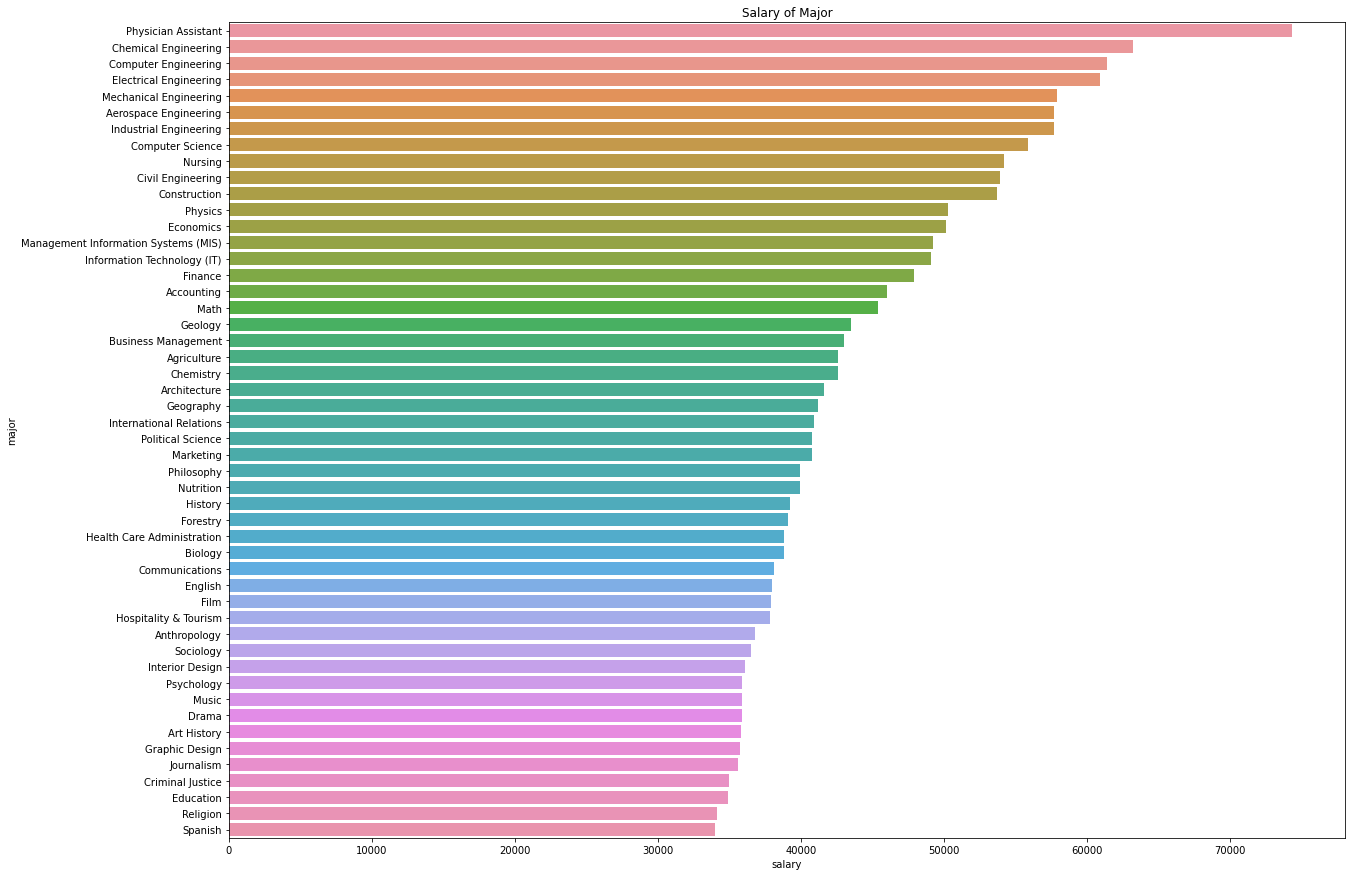

In [ ]:
#display the Salary of Major barplot 
plt.figure(figsize=(20, 15))
major_salary = sns.barplot(x='salary', y='major', data=major);
major_salary.set_title('Salary of Major');

Based on the barplot above, it shows that Physician Assistant has the highest salary while major in Spanish has the lowest. 

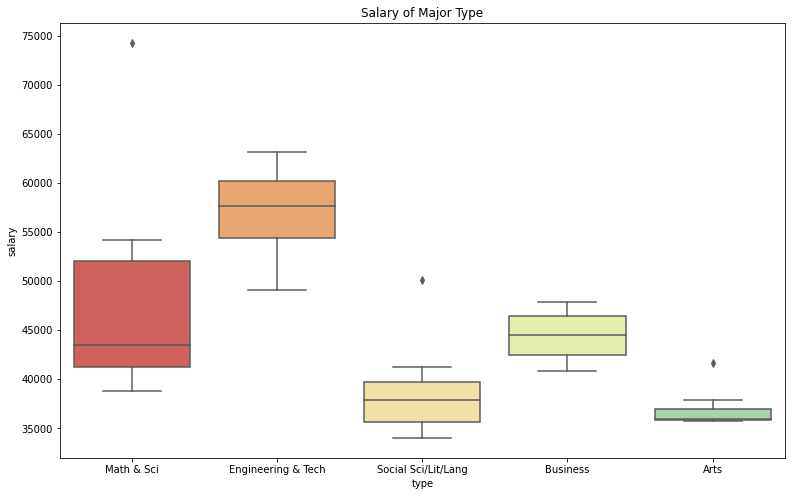

In [ ]:
#display boxplot of salary of major type 
plt.figure(figsize=(13, 8))
major_type = sns.boxplot(x='type', y='salary', data=major)
major_type.set_title('Salary of Major Type');

Although Math & Sci subgroup contains one major subject that has the highest salary (at around 74000), Engineering & Tech group seems to have the highest average starting salary among other subgroups from around 49000 to 64000 dollar based on the boxplot above.


Then, we can plot the data using boxplot to check if there are any wild outliers and find their approximate location: 

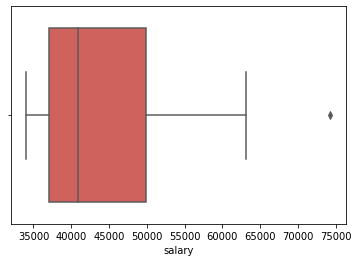

In [ ]:
#approximately locate the outliers using boxplot
sns.boxplot(x='salary', data=major);

Through plotting the data into a boxplot, it seems it has only one outlier within the salary data. To discover its exact location and filter out the outlier, we utilize the 0.01 and 0.99 quantiles method below:

In [ ]:
#apply quantiles method  
lower= major['salary'].quantile(0.01)
upper = major['salary'].quantile(0.99)
upper,lower

(68860.99999999999, 34049.0)

In [ ]:
#filter the outlier 
major_wo_outlier = major[(major['salary'] >= lower)&(major['salary'] <= upper)]

Now, we can look at the differences in the distribution of the major subgroups between the dataset with and without the outlier by displaying the boxplots: 

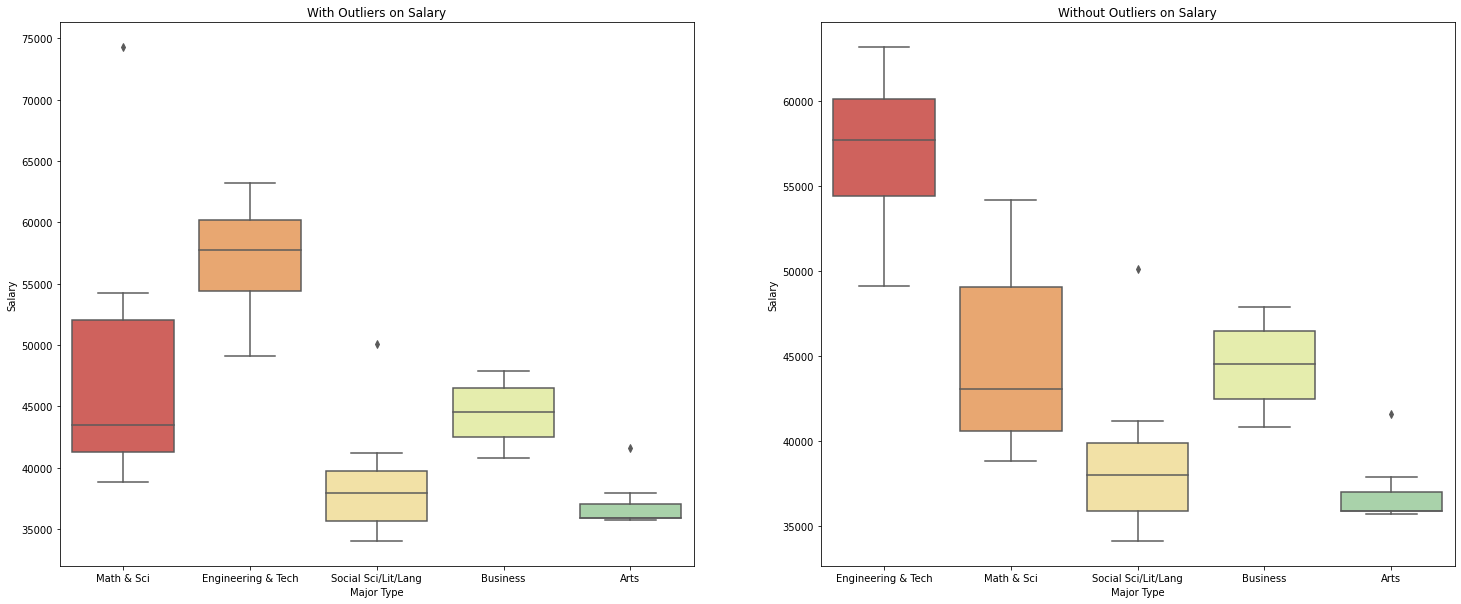

In [ ]:
#compare two boxplots based on the outliers
fig,(ax1,ax2) = plt.subplots(1,2, figsize=(25,10))

sns.boxplot(ax=ax1, data=major, x='type', y='salary')
ax1.set_title('With Outliers on Salary')
ax1.set(xlabel='Major Type', ylabel='Salary')

sns.boxplot(ax=ax2, data=major_wo_outlier, x='type', y='salary')
ax2.set_title('Without Outliers on Salary')
ax2.set(xlabel='Major Type', ylabel='Salary');

We can see that the distribution has changed when the outliers are removed. 
The major type that has the highest salary becomes Engineering & Tech instead of Math & Sci when we excluded the outliers. However, we believe that the outlier seems to have significant meaning to our analysis, so we decide to plot  both dataframes and temporarily keep the dataframe that without the outliers for our further analysis.



###College Quality

**(1) Structure**

In [ ]:
# check for the shape of the dataset
quality.head()

,name,salary,rank
0,california institute of technology,75500,1
1,massachusetts institute of technology,72200,5
2,princeton university,66500,7
3,harvard university,63400,6
4,carnegie mellon university,61800,22


In [ ]:
# check for missing values in the quality dataset
print(quality['name'].hasnans, quality['salary'].hasnans, quality['rank'].hasnans)

False False False


we could see that this is tabular data with observations in rows and variables in columns, and the data is stored in a single dataset.

**(2) Granularity**

This dataset is considered to have a group-level granularity since the salary data is acquired by summarizing information of multiple graduates from the college.

**(3) Scope**

The description of the original college_df dataset states that the data is collected from bacholar's degree graduates from U.S. colleges. This fits with our research question as it aims to investigate the starting salary of college graduates in the United States. The other dataset used is rank_df, which provides world rank information of different colleges, some of which are included in the college_df, and thus covering the college quality part of our research question.

**(4) Temporality**

The dataframe itself does not contain any timestamps, but the rank_df contains ranks for years 2011 to 2016. We chose the newest ranking, which is 2016, so the rankings in quality are from 2016. 

**(5) Faithfulness**

The college dataframe contains 269 real universities, and the ranking dataframe contains 799 college rankings; after merging the two dataframes, quality contains 90 observations. The universities are all real universities, and the college rankings are similar to what we expected. Therefore, the data is faithful. 

In [ ]:
print(len(college_df), len(exact_rank_df), len(quality))

269 799 90


After going over the five properties of quality dataset, we will then look at some of its basic statistics:

In [ ]:
# look at stats of the quality dataset
quality.describe()

,salary,rank
count,90.000000,90.000000
mean,48823.333333,259.266667
std,7127.980157,208.165762
min,37300.000000,1.000000
25%,44150.000000,75.000000
50%,46950.000000,221.000000
75%,51850.000000,398.250000
max,75500.000000,772.000000


We have two variables in our dataset, the first one is the rank of the college and the second one is the median starting salary of that college. We try to visualize the relationship between these two variables:

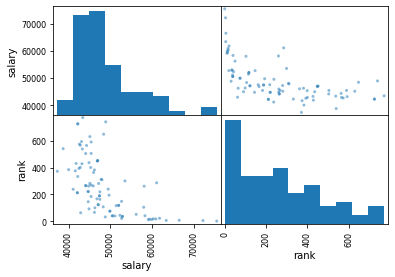

In [ ]:
# visualize the scatterplot of rank and salary
pd.plotting.scatter_matrix(quality);

The trend seems vaguely linear, but there seems to be some outliers in the salary column. A histogram could be used to further look into the distribution:

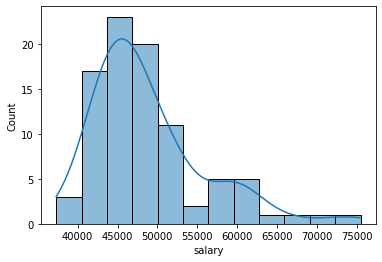

In [ ]:
# plot a histogram of salary
sns.histplot(quality['salary'], kde=True);

The distribution skews to the right. A box plot could be used to locate the outliers:

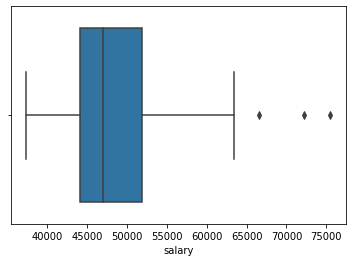

In [ ]:
# plot a box plot to locate potential outliers
sns.boxplot(x='salary', data=quality);

It seems clear that there are three outliers exceeding the upper threshold and no outliers on the lower side. Calculation is needed to find the exact value for the upper and lower boundaries.

In [ ]:
# calculate the quantiles and IQR of salary
Q1 = quality['salary'].quantile(0.25)
Q3 = quality['salary'].quantile(0.75)
IQR = Q3 - Q1
print(Q1, Q3, IQR)

44150.0 51850.0 7700.0


In [ ]:
# calculate boundaries for outliers
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
print(lower, upper)

32600.0 63400.0


After we get the boundaries, we could slice out the rows with salaries outliers to see if the information presented in the box plot makes sense.

In [ ]:
# try to locate any lower ourliers
quality_lower_outliers = quality[quality['salary'] < lower]
quality_lower_outliers

,name,salary,rank


In [ ]:
# try to locate any upper ourliers
quality_upper_outliers = quality[quality['salary'] > upper]
quality_upper_outliers

,name,salary,rank
0,california institute of technology,75500,1
1,massachusetts institute of technology,72200,5
2,princeton university,66500,7


This helps us to find three outliers on the upper side and no outliers on the lower side, which fits in with what we got from the box plot.

These outliers are valuable for further exploration, but they can be misleading when we are trying to find the overall trend. We consider temporarily excluding them from our dataset to get a clearer view on the distribution of salary:

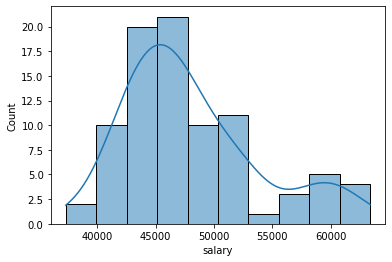

In [ ]:
# exclude the outliers and check out the distribution again
no_outlier_quality = quality[quality['salary'] <= upper]
sns.histplot(no_outlier_quality['salary'], kde=True, bins=10);

The histogram now shows a bimodal distribution. We try to separate the two modes and find each of their relationships with respect to rank.

In [ ]:
#dataframe showing the results of the histogram
bimodal_df = pd.cut(no_outlier_quality['salary'], bins = 10).value_counts(sort=False)
bimodal_df

(37273.9, 39910.0]     2
(39910.0, 42520.0]    10
(42520.0, 45130.0]    20
(45130.0, 47740.0]    21
(47740.0, 50350.0]    10
(50350.0, 52960.0]    11
(52960.0, 55570.0]     1
(55570.0, 58180.0]     3
(58180.0, 60790.0]     5
(60790.0, 63400.0]     4
Name: salary, dtype: int64

From the histogram and dataframe above, we will split the dataset into two. One will be a salary below 52960, and the other will be a salary above 52960. 

In [ ]:
#splitting quality into two dataframes based on the results above
lower_sal_df = no_outlier_quality[no_outlier_quality['salary'] <= 52960.0]
upper_sal_df = no_outlier_quality[no_outlier_quality['salary'] > 52960.0]

In [ ]:
lower_sal_df.head()

,name,salary,rank
16,university of illinois urbana-champaign,52900,36
17,university of illinois urbana-champaign,52900,36
18,university of virginia,52700,148
19,university of michigan,52700,21
20,university of california davis,52300,44


In [ ]:
upper_sal_df.head()

,name,salary,rank
3,harvard university,63400,6
4,carnegie mellon university,61800,22
5,rensselaer polytechnic institute,61100,286
6,university of pennsylvania,60900,17
7,cornell university,60300,18


We will first try to find a relationship between rank and salary for the two separate dataframes. 

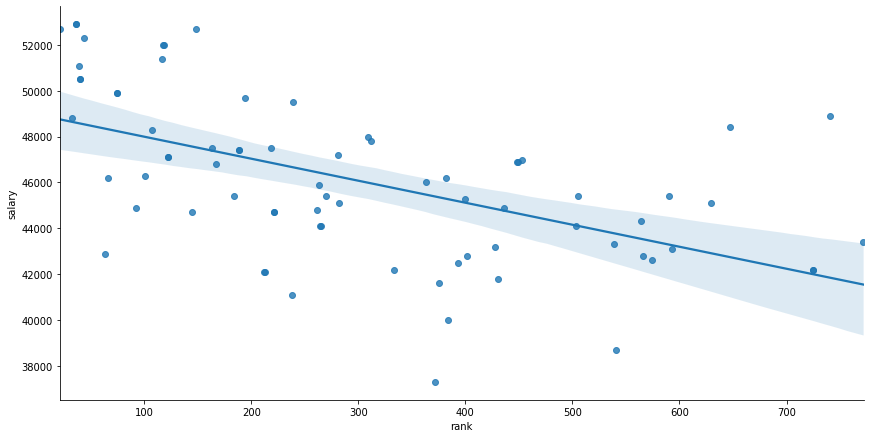

In [ ]:
# plot scatterplot of smaller mode between rank and salary
sns.lmplot(x='rank', y='salary', 
           data=lower_sal_df, fit_reg=True, 
           height=6, aspect=2, 
           x_jitter=.5, y_jitter=.5);

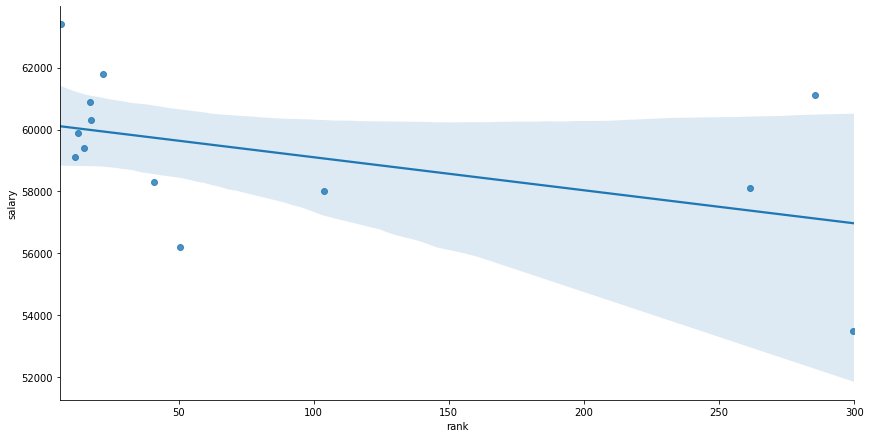

In [ ]:
# plot scatterplot of bigger mode between rank and salary
sns.lmplot(x='rank', y='salary', 
           data=upper_sal_df, fit_reg=True, 
           height=6, aspect=2, 
           x_jitter=.5, y_jitter=.5);

From the two plots above, we see that the dataframe where the first mode occurs shows a somewhat negative correlation between rank and salary, and the datapoints are scattered across the graph. On the other hand, for the dataframe with the higher salaries, most of the ranks are somewhere below 50, with only a few greater than 50. A relationship is not quite evident in this case. Therefore, despite the salary showing a bimodel distribution, we will not be separating the dataset into two for our modeling. 

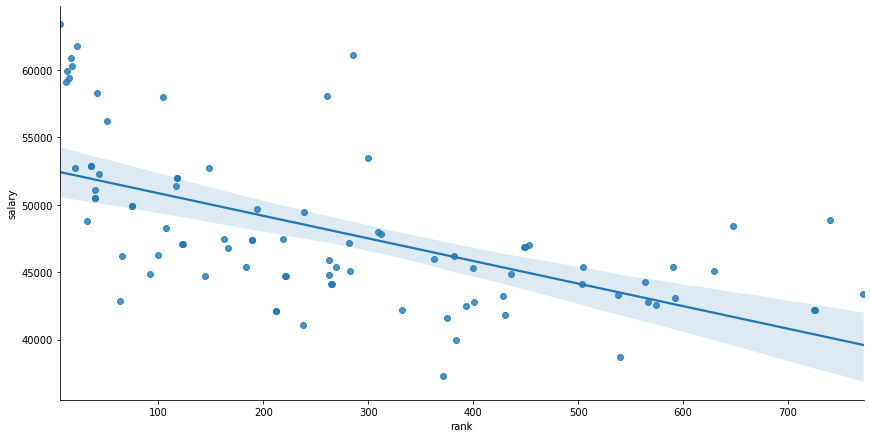

In [ ]:
# plot scatterplot between rank and salary
sns.lmplot(x='rank', y='salary', 
           data=no_outlier_quality, fit_reg=True, 
           height=6, aspect=2, 
           x_jitter=.5, y_jitter=.5);

Using the entire salary distribution, the scatter plot above shows a potential negative correlation between rank and salary. As the university quality becomes lower, the starting median salary also decreases. 

###Gender & Internship Experience

**(1) Structure**


In [18]:
# look at the amount of each gender
gender_df['gender'].value_counts()

male      100
female     48
Name: gender, dtype: int64

In [19]:
# look at stats of the female 
gender_df[gender_df['gender']=='female'].salary.describe()

count        48.000000
mean     267291.666667
std       75948.178955
min      200000.000000
25%      219500.000000
50%      250000.000000
75%      300000.000000
max      650000.000000
Name: salary, dtype: float64

In [20]:
gender_df[gender_df['gender']=='male'].salary.describe()

count       100.000000
mean     298910.000000
std       99514.792058
min      200000.000000
25%      250000.000000
50%      270000.000000
75%      300000.000000
max      940000.000000
Name: salary, dtype: float64

**(2) Granularity**

The granularity of the gender dataset is at group-level since the data stored all the summarized information of group of graduates who have different genders and work experience.

**(3) Scope**

The dataset includes the gender and internship information when presents the salary. And this can help us to continue work on our research question whether gender or work experience influence the starting salary. 

**(4) Temporality**

THe dataset doesn't include a timestamp but from the kaggle, it says the dataset was updated a year ago. 

**(5) Faithfulness**

This data set consists of Placement data of students in an anonymous campus. It includes secondary and higher secondary school percentage and specialization. It also includes degree specialization, type and work experience and salary offers to the placed students. This information is provdied by Dr. Dhimant Ganatara, Professor Jain University. In that case, we can assume that the dataset is faithful.

By observing those data, we can find that the mean value of the male's salary is slightly higher than the female's. The min value and the 75% value for each group are the same, but the 25% value and the 50% value for the male group is higher than the female group. This can be explained by that the female's salary is kind of concentrated in the lower range.

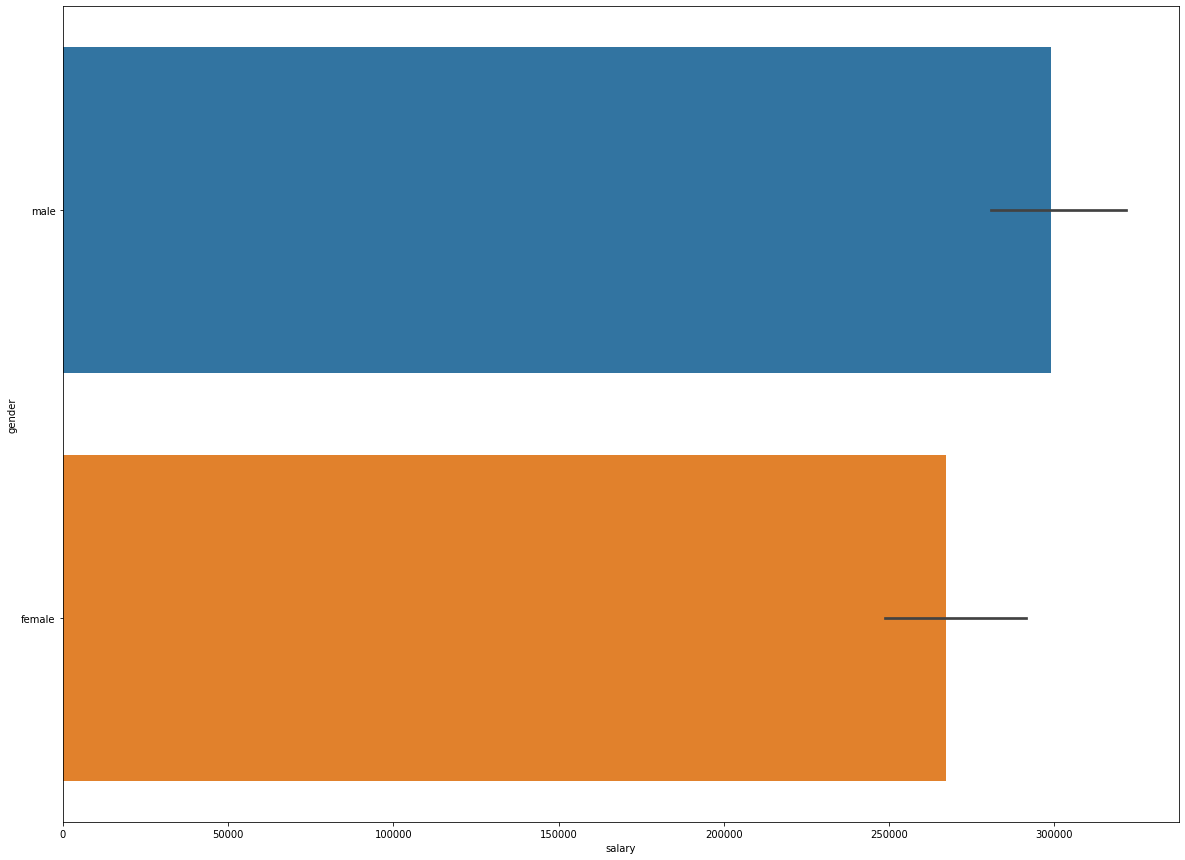

In [21]:
#barplot for the dataset
plt.figure(figsize=(20,15))
sns.barplot(x="salary", y="gender", data=gender_df);

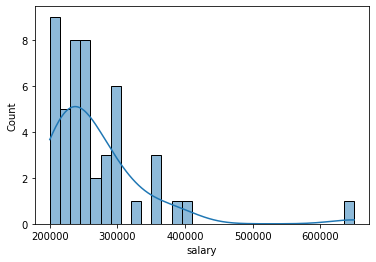

In [22]:
# take a look at the distribution of female's salary
sns.histplot(data=gender_df[gender_df['gender']=='female'], x="salary", kde=True, bins=30)

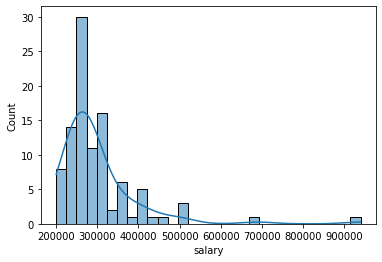

In [23]:
# take a look at the distribution of male's salary
sns.histplot(data=gender_df[gender_df['gender']=='male'], x="salary", kde=True, bins=30)

Since the number of males and females contained in the dataset are not equal, the histogram has differnt scales on y-axis, but we can still see that comparing to male, female has a higher density at low salary. A boxplot can also show this feature:

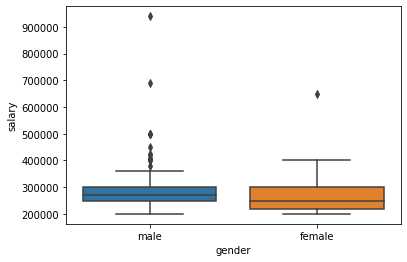

In [24]:
# use boxplot
sns.boxplot(x='gender', y='salary', data=gender_df)

In [25]:
# try to filter out the outliers for each gender
f_lower= gender_df[gender_df['gender']=='female'].salary.quantile(0.01)
f_upper = gender_df[gender_df['gender']=='female'].salary.quantile(0.99)
f_upper, f_lower

(532500.0000000002, 200000.0)

In [26]:
m_lower= gender_df[gender_df['gender']=='male'].salary.quantile(0.01)
m_upper = gender_df[gender_df['gender']=='male'].salary.quantile(0.99)
m_upper, m_lower

(692500.0000000013, 200000.0)

In [27]:
gender_wo_out = gender_df

gender_wo_out = gender_wo_out.drop(gender_wo_out[(gender_wo_out['gender']=='female')&(gender_wo_out['salary']<=f_lower)].index)
gender_wo_out = gender_wo_out.drop(gender_wo_out[(gender_wo_out['gender']=='female')&(gender_wo_out['salary']>=f_upper)].index)

gender_wo_out = gender_wo_out.drop(gender_wo_out[(gender_wo_out['gender']=='male')&(gender_wo_out['salary']<=m_lower)].index)
gender_wo_out = gender_wo_out.drop(gender_wo_out[(gender_wo_out['gender']=='male')&(gender_wo_out['salary']>=m_upper)].index)
gender_wo_out

,gender,salary,workex,major
1,male,690000.0,1,Sci&Tech
3,male,500000.0,0,Sci&Tech
4,male,500000.0,1,Sci&Tech
5,male,500000.0,1,Sci&Tech
6,male,450000.0,0,Sci&Tech
...,...,...,...,...
137,female,210000.0,1,Comm&Mgmt
138,female,210000.0,1,Sci&Tech
139,female,210000.0,0,Comm&Mgmt
140,female,204000.0,0,Comm&Mgmt


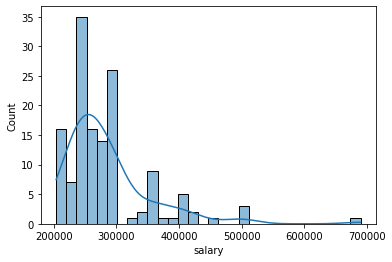

In [28]:
#plot again to see the distribution of whole dataset
sns.histplot(data=gender_wo_out, x="salary", kde=True, bins=30)

It seems like we still need to filter the dataset. And maybe it is better to filter base on gender but it may cause more bias so at this point we consider whether other factors may affect.

However, will other factors affect the salary? Now, take a look at the effect of work experiences.

In [29]:
# take a look at the description of inexperienced person's salary
gender_wo_out[gender_wo_out['workex']==0].salary.describe()

count        81.000000
mean     280395.061728
std       60898.825730
min      204000.000000
25%      240000.000000
50%      265000.000000
75%      300000.000000
max      500000.000000
Name: salary, dtype: float64

In [30]:
# take a look at the description of experienced person's salary
gender_wo_out[gender_wo_out['workex']==1].salary.describe()

count        59.000000
mean     291847.457627
std       80851.249870
min      204000.000000
25%      250000.000000
50%      270000.000000
75%      300000.000000
max      690000.000000
Name: salary, dtype: float64

Text(0.5, 1.0, 'Experienced person')

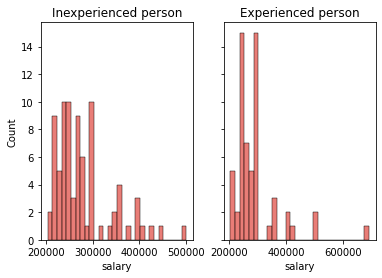

In [31]:
# take a look at the distribution of two groups
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True)
sns.set_palette('Spectral')
sns.histplot(data=gender_wo_out[gender_wo_out['workex']==0], x="salary", ax=ax1, kde=False, bins=30)
ax1.set_title('Inexperienced person')
sns.histplot(data=gender_wo_out[gender_wo_out['workex']==1], x="salary", ax=ax2, kde=False, bins=30)
ax2.set_title('Experienced person')

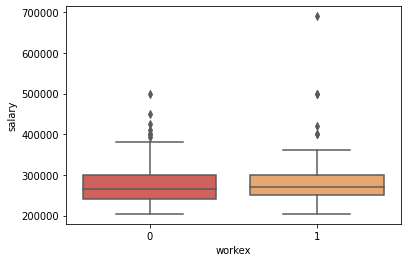

In [32]:
# use boxplot
sns.boxplot(x='workex', y='salary', data=gender_wo_out)

In [33]:
gender_wo_out['major'].unique()

array(['Sci&Tech', 'Comm&Mgmt', 'Others'], dtype=object)

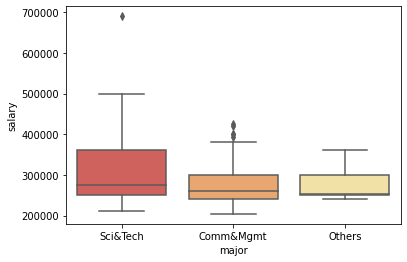

In [34]:
sns.boxplot(x='major', y='salary', data=gender_wo_out)

We find that both gender and internship experience may exert an influence the starting salary.

##Inferential Analysis

###Major

For our regression analysis,  we decide to utilize the dataset that includes the outliers on salary instead of the one that does not, since we believe that each of the variables are significant, especially when each major is unique in the dataset which might negatively affect our final result if we remove one of them.  

We first transfer the categorical variables into dummy variables from the cleaned major dataset and create a new dataframe "major dummy":

In [35]:
#transfer the categorical variables in to dummies
major_dummy= pd.get_dummies(major['type'])
#join two dataframes
major_dummy= pd.concat([major,major_dummy],axis=1)
#drop the repeated columns 
major_dummy.drop(['type'], axis =1,inplace=True)
major_dummy.head()

,major,salary,Arts,Business,Engineering & Tech,Math & Sci,Social Sci/Lit/Lang
0,Physician Assistant,74300,0,0,0,1,0
1,Chemical Engineering,63200,0,0,1,0,0
2,Computer Engineering,61400,0,0,1,0,0
3,Electrical Engineering,60900,0,0,1,0,0
4,Mechanical Engineering,57900,0,0,1,0,0


Then , we use the OLS model below to display the regression results:

In [36]:
X = major_dummy.drop(['major','salary'],axis=1)
Y = major_dummy['salary']

In [37]:
major_model = sm.OLS(Y, X)
major_res= major_model.fit()
print(major_res.summary())

                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.630
Model:                            OLS   Adj. R-squared:                  0.597
Method:                 Least Squares   F-statistic:                     19.15
Date:                Mon, 07 Jun 2021   Prob (F-statistic):           2.94e-09
Time:                        06:53:18   Log-Likelihood:                -502.81
No. Observations:                  50   AIC:                             1016.
Df Residuals:                      45   BIC:                             1025.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Arts                 3.699e+04   2

The above regression model shows that the R-squared value is 0.63 which means the percentage of the data to fit the regression line is 63%. 

In [38]:
#check the corr between the variables 
major_dummy.corr()

,salary,Arts,Business,Engineering & Tech,Math & Sci,Social Sci/Lit/Lang
salary,1.000000,-0.318897,0.003659,0.667977,0.192720,-0.494508
Arts,-0.318897,1.000000,-0.118978,-0.201737,-0.214279,-0.302605
Business,0.003659,-0.118978,1.000000,-0.147442,-0.156608,-0.221163
Engineering & Tech,0.667977,-0.201737,-0.147442,1.000000,-0.265543,-0.375000
Math & Sci,0.192720,-0.214279,-0.156608,-0.265543,1.000000,-0.398314
Social Sci/Lit/Lang,-0.494508,-0.302605,-0.221163,-0.375000,-0.398314,1.000000


P.S. Based on the correlation table above, Engineering & Tech major has the strongest positive relationship with salary than other major types with the value of ~0.668.

###College Quality

In [ ]:
# linear regression model for college quality and salary

quality_outcome, quality_predictors = patsy.dmatrices('salary ~ rank', no_outlier_quality)
quality_mod = sm.OLS(quality_outcome, quality_predictors)
quality_res = quality_mod.fit()
print(quality_res.summary())

                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.354
Model:                            OLS   Adj. R-squared:                  0.347
Method:                 Least Squares   F-statistic:                     46.64
Date:                Mon, 07 Jun 2021   Prob (F-statistic):           1.20e-09
Time:                        03:19:39   Log-Likelihood:                -857.91
No. Observations:                  87   AIC:                             1720.
Df Residuals:                      85   BIC:                             1725.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.254e+04    828.253     63.432      0.0

The summary above indicates that the relationship between college quality and salary can be expressed by salary = 52540 - 16.7623 * rank. This indicates increased college quality, represented by a decrease in the numerical rank, can lead to an increase in the median starting salary of college graduates. 35.4% of the variation in salary is explained by college rank/quality.

The regression can be visualized in the following graph:

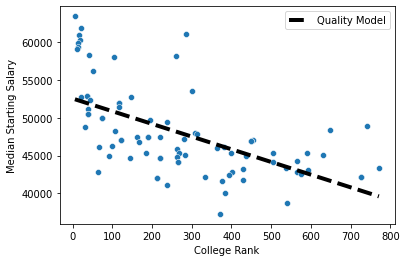

In [ ]:
# Plot the orginal data on a scatter plot
sns.scatterplot(x='rank', y='salary', data=no_outlier_quality);

# Generate and plot the model fit line for quality
xs = np.arange(no_outlier_quality['rank'].min(), no_outlier_quality['rank'].max())
ys = -16.7623 * xs + 5.254e+04
plt.plot(xs, ys, '--k', linewidth=4, label='Quality Model')

# Rename the axis
plt.xlabel('College Rank')
plt.ylabel('Median Starting Salary')
plt.legend();

### Gender & Internship Experience

In [ ]:
# generate linear regression model. Gender is the predictor
gender_outcome, gender_predictor = patsy.dmatrices('salary ~ gender', gender_wo_out)
gender_model = sm.OLS(gender_outcome, gender_predictor)
gender_result = gender_model.fit()
print(gender_result.summary())

                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.039
Model:                            OLS   Adj. R-squared:                  0.032
Method:                 Least Squares   F-statistic:                     5.541
Date:                Sun, 06 Jun 2021   Prob (F-statistic):             0.0200
Time:                        15:10:05   Log-Likelihood:                -1757.2
No. Observations:                 140   AIC:                             3518.
Df Residuals:                     138   BIC:                             3524.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       2.647e+05   1.05e+04     25.

In [ ]:
# generate linear regression model. Work experience is the predictor 
gender_outcome, gender_predictor = patsy.dmatrices('salary ~ workex', gender_wo_out)
gender_model = sm.OLS(gender_outcome, gender_predictor)
gender_result = gender_model.fit()
print(gender_result.summary())

                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.9142
Date:                Sun, 06 Jun 2021   Prob (F-statistic):              0.341
Time:                        15:10:05   Log-Likelihood:                -1759.5
No. Observations:                 140   AIC:                             3523.
Df Residuals:                     138   BIC:                             3529.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.804e+05   7775.678     36.061      0.0

#### Further Exploration on the Dataset for Gender and Internship Experience

When we only consider gender or internship experience to predict salary, the R-squared is really small, which means that the model is not good enough. So we decide to add in other factors to run a multiple lienar regression to improve our model. 

In [ ]:
#hot encode major 
gender_wo_out['major'] = gender_wo_out.major.map({"Comm&Mgmt":0,"Sci&Tech":1, "Others":2})
#generate regression model for gender, major, workex
gender_outcome, gender_predictor = patsy.dmatrices('salary ~ gender + major + workex', gender_wo_out)
gender_model = sm.OLS(gender_outcome, gender_predictor)
gender_result = gender_model.fit()
print(gender_result.summary())

                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.103
Model:                            OLS   Adj. R-squared:                  0.083
Method:                 Least Squares   F-statistic:                     5.220
Date:                Sun, 06 Jun 2021   Prob (F-statistic):            0.00193
Time:                        15:10:05   Log-Likelihood:                -1752.3
No. Observations:                 140   AIC:                             3513.
Df Residuals:                     136   BIC:                             3524.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       2.495e+05   1.17e+04     21.

Since the R-square is only 0.103, which indicates that the model barely represent the relationship between outcome and predictors, we decide to include some other columns from the original dataset. We will use exlusive method by checking the p-value of each predictors or vairables in our regression model, trying to find the most significant factors that influence the salary within this dataset.

In [ ]:
#check the shape of dataset
gender.shape

(148, 15)

In [ ]:
#This time we consider the original dataset and drop some useless columns
gender_df2 = gender.drop(columns=['sl_no','status','ssc_b','hsc_b','hsc_s'])
gender_df2 = gender_df2.dropna()

In [ ]:
#Doing data cleaning for the new dataset
gender_df2['workex'] = gender_df2['workex'].apply(binarize_column)
gender_df2['gender'] = gender_df2['gender'].apply(standardize_gender)
gender_df2 = gender_df2.rename(columns = {'degree_t': 'major'})

In [ ]:
gender_df2.head()

,gender,ssc_p,hsc_p,degree_p,major,workex,etest_p,specialisation,mba_p,salary
0,male,67.00,91.00,58.00,Sci&Tech,0,55.0,Mkt&HR,58.80,270000.0
1,male,79.33,78.33,77.48,Sci&Tech,1,86.5,Mkt&Fin,66.28,200000.0
2,male,65.00,68.00,64.00,Comm&Mgmt,0,75.0,Mkt&Fin,57.80,250000.0
4,male,85.80,73.60,73.30,Comm&Mgmt,0,96.8,Mkt&Fin,55.50,425000.0
7,male,82.00,64.00,66.00,Sci&Tech,1,67.0,Mkt&Fin,62.14,252000.0


In [ ]:
# try to filter out the outliers
f_lower= gender_df2[gender_df2['gender']=='female'].salary.quantile(0.01)
f_upper = gender_df2[gender_df2['gender']=='female'].salary.quantile(0.99)

m_lower= gender_df2[gender_df2['gender']=='male'].salary.quantile(0.01)
m_upper = gender_df2[gender_df2['gender']=='male'].salary.quantile(0.99)

gender_wo_out2 = gender_df2

gender_wo_out2 = gender_wo_out2.drop(gender_wo_out2[(gender_wo_out2['gender']=='female')&(gender_wo_out2['salary']<=f_lower)].index)
gender_wo_out2 = gender_wo_out2.drop(gender_wo_out2[(gender_wo_out2['gender']=='female')&(gender_wo_out2['salary']>=f_upper)].index)

gender_wo_out2 = gender_wo_out2.drop(gender_wo_out2[(gender_wo_out2['gender']=='male')&(gender_wo_out2['salary']<=m_lower)].index)
gender_wo_out2 = gender_wo_out2.drop(gender_wo_out2[(gender_wo_out2['gender']=='male')&(gender_wo_out2['salary']>=m_upper)].index)

gender_wo_out2['major'] = gender_wo_out2.major.map({"Comm&Mgmt":0,"Sci&Tech":1, "Others":2})

In [ ]:
gender_outcome, gender_predictor = patsy.dmatrices('salary ~ gender+ssc_p+hsc_p+degree_p+major+workex+etest_p+specialisation+mba_p', 
                                                   gender_wo_out2)
gender_model = sm.OLS(gender_outcome, gender_predictor)
gender_result = gender_model.fit()
print(gender_result.summary())

                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.175
Model:                            OLS   Adj. R-squared:                  0.118
Method:                 Least Squares   F-statistic:                     3.068
Date:                Sun, 06 Jun 2021   Prob (F-statistic):            0.00229
Time:                        15:10:05   Log-Likelihood:                -1746.5
No. Observations:                 140   AIC:                             3513.
Df Residuals:                     130   BIC:                             3542.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

We can remove the least significant variable which has the highest p-value.

So we remove workex.

In [ ]:
gender_outcome, gender_predictor = patsy.dmatrices('salary ~ gender+ssc_p+hsc_p+degree_p+major+etest_p+specialisation+mba_p', 
                                                   gender_wo_out2)
gender_model = sm.OLS(gender_outcome, gender_predictor)
gender_result = gender_model.fit()
print(gender_result.summary())

                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.174
Model:                            OLS   Adj. R-squared:                  0.123
Method:                 Least Squares   F-statistic:                     3.441
Date:                Sun, 06 Jun 2021   Prob (F-statistic):            0.00125
Time:                        15:10:05   Log-Likelihood:                -1746.6
No. Observations:                 140   AIC:                             3511.
Df Residuals:                     131   BIC:                             3538.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

Applying the same principle, we remove hsc_p.

In [ ]:
gender_outcome, gender_predictor = patsy.dmatrices('salary ~ gender+ssc_p+degree_p+major+etest_p+specialisation+mba_p', 
                                                   gender_wo_out2)
gender_model = sm.OLS(gender_outcome, gender_predictor)
gender_result = gender_model.fit()
print(gender_result.summary())

                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.172
Model:                            OLS   Adj. R-squared:                  0.128
Method:                 Least Squares   F-statistic:                     3.914
Date:                Sun, 06 Jun 2021   Prob (F-statistic):           0.000655
Time:                        15:10:05   Log-Likelihood:                -1746.7
No. Observations:                 140   AIC:                             3509.
Df Residuals:                     132   BIC:                             3533.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

Applying the same principle,We remove etest_p.

In [ ]:
gender_outcome, gender_predictor = patsy.dmatrices('salary ~ gender+ssc_p+degree_p+major+specialisation+mba_p', 
                                                   gender_wo_out2)
gender_model = sm.OLS(gender_outcome, gender_predictor)
gender_result = gender_model.fit()
print(gender_result.summary())

                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.170
Model:                            OLS   Adj. R-squared:                  0.133
Method:                 Least Squares   F-statistic:                     4.554
Date:                Sun, 06 Jun 2021   Prob (F-statistic):           0.000311
Time:                        15:10:05   Log-Likelihood:                -1746.9
No. Observations:                 140   AIC:                             3508.
Df Residuals:                     133   BIC:                             3528.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

Applying the same principle,We remove ssc_p.

In [ ]:
gender_outcome, gender_predictor = patsy.dmatrices('salary ~ gender+degree_p+major+specialisation+mba_p', 
                                                   gender_wo_out2)
gender_model = sm.OLS(gender_outcome, gender_predictor)
gender_result = gender_model.fit()
print(gender_result.summary())

                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.167
Model:                            OLS   Adj. R-squared:                  0.136
Method:                 Least Squares   F-statistic:                     5.359
Date:                Sun, 06 Jun 2021   Prob (F-statistic):           0.000159
Time:                        15:10:05   Log-Likelihood:                -1747.2
No. Observations:                 140   AIC:                             3506.
Df Residuals:                     134   BIC:                             3524.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

Applying the same principle,we remove degree_p.

In [ ]:
gender_outcome, gender_predictor = patsy.dmatrices('salary ~ gender+major+specialisation+mba_p', 
                                                   gender_wo_out2)
gender_model = sm.OLS(gender_outcome, gender_predictor)
gender_result = gender_model.fit()
print(gender_result.summary())

                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.163
Model:                            OLS   Adj. R-squared:                  0.138
Method:                 Least Squares   F-statistic:                     6.554
Date:                Sun, 06 Jun 2021   Prob (F-statistic):           7.51e-05
Time:                        15:10:05   Log-Likelihood:                -1747.5
No. Observations:                 140   AIC:                             3505.
Df Residuals:                     135   BIC:                             3520.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

Applying the same principle, we remove specialisation.

In [ ]:
gender_outcome, gender_predictor = patsy.dmatrices('salary ~ gender+major+mba_p', 
                                                   gender_wo_out2)
gender_model = sm.OLS(gender_outcome, gender_predictor)
gender_result = gender_model.fit()
print(gender_result.summary())

                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.157
Model:                            OLS   Adj. R-squared:                  0.139
Method:                 Least Squares   F-statistic:                     8.474
Date:                Sun, 06 Jun 2021   Prob (F-statistic):           3.35e-05
Time:                        15:10:05   Log-Likelihood:                -1747.9
No. Observations:                 140   AIC:                             3504.
Df Residuals:                     136   BIC:                             3516.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       6.629e+04   6.29e+04      1.

After removing those least significant variables, gender, major, and mba_p are left.
The model has a low R-square value which indicates the predictors cannot precisely predict the outcome using this model. 

However, comparing to other variables, gender, major, and MBA percentage significantly affect the salary.This also calls back to the previous regression results, where the linear regression model for major has a higher R-squared value compared to those of the other three factors.

# Ethics & Privacy

In our dataset, it may contain many potential biases with the data. After merging the two datasets, we have only 90 observations, so our dataset does not include every university in the US. This means that our dataset does not completely represent the entire population that we are targeting. Another potential bias can come from the collectors of the dataset. Sources collect data through different methodologies and categorize variables in different ways. Although our datasets were collected from Kaggle, a credible source, they were collected from different people and through different methodologies. This could potentially add human biases but would only have minimal effect. Other than biases, we did not have major privacy and terms of use issues with our data. No personal names were revealed, and the datasets are public to everyone.

Even though we aim to minimize biases and privacy issues, there could be other issues related to our topic and data. For example, our data and results may reflect spurious correlations to race/ethnicity; some universities may have a higher international student population, reflecting a higher international recognition. Other inherent issues include the nature of certain jobs. The salary of some government jobs may be kept private, leaving a gap for salaries for students majoring in political science. Despite eliminating bias and privacy issues, there may also be potential negative consequences of our findings. Our results may discourage people from choosing particular majors or universities because they turn out to get a lower starting salary. However, our results only provide insight on the starting salaries, and many fields have a longer preparation time and may have a higher average salary overall. 


#Conclusion & Discussion

In this project, we try to explore any potential relationships between the starting salary of college graduates and four main factors: major, college quality, gender, and internship experience. We hypothesized that major would be the most influential factor due to high demands on graduates from majors like Engineering and Computer Science from the industry. Three online datasets were recruited for our subsequent analysis. The first dataset contains information about majors and their starting salaries. We kept the necessary columns, and subdivided the majors into five groups: Arts, Business, Engineering & Tech, Math & Sci, and Social Sci/Lit/Lang. We then fitted an OLS model between the subgroups and starting salaries, gaining an R-squared value of 0.63 and a p-value less than 0.0005. The second dataset provides information about college rank, and was merged with a part of the first dataset which contains names of the colleges and the median starting salaries of their graduates. After excluding the outliers, another OLS model was fitted, resulting in an R-squared value of 0.354 and p-values less than 0.0005. The third dataset includes information mainly on gender, work experience, and the starting salary. We trained the OLS model solely on gender as the predictor for the starting salary, which gave out a small R-squared value of 0.039, and a large p-value of 0.2. We then trained the OLS model solely on work experience as the predictor. The resulting R-squared value is only 0.007, and the p-value is 0.341. Overall, our hypothesis is supported by these models as the linear regression model based on majors has the largest R-squared value among the four.

Comparing results from these models, we conclude that major is the most representative factors among the four since its linear regression model has the highest R-squared value among them. In other words, the model for major explains the most variability of the starting salary, which makes it the most influential factor among the four. These results support our hypothesis. Noticably, the model of the third dataset, which contains gender, has a very low R-squared value which means the OLS model can barely use gender to predict the starting salary. To further confirm whether gender matters, we decided to take some other variables (secondary education percentage, higher secondary education percentage, degree percentage…)  in the original dataset into account and gradually remove the less significant variables. In the end, the remaining variables are gender and major. Although the third model barely shows any influence of predictors on the starting salary, this result may imply that gender and major are relatively influential comparing to other factors such as work experience.

However, since we use three separate datasets to train different OLS models, the result is not persuasive enough. The unrepresentativeness of the third model could be attributed to the dataset and variables. Since gender is a binary variable, it is not appropriate to use it as a predictor to train the OLS model. If we had a dataset that contains gender, college ranks, internship experience, majors, and starting salaries in a single table, or if models other than linear regression are considered, the result may be more persuasive. Anyway, based on this result, we conclude that starting salaries of college graduates are influenced more by the majors they have chosen comparing to other factors like college quality, gender, or internship experience. Therefore, students entering colleges should choose wisely on their major if they want to find a job with high starting salary right after they got their bachelor’s degrees.

# Team Contributions


*   **Moyu Lyu**: Complete the background with Chen Yang. Data cleaning, EDA & Inferential Analysis of the Rank dataset with Catherine Ma. Overview and conclusion for materials used in the Video.
*   **Catherine Ma**: Completed the Ethics & Privacy part with Ka Lam Wong; Cooperated with Moyu Lyu on EDA of Rank dataset; Video presentation 
*   **Ka Lam Wong**: Data cleaning, EDA & Inferential Analysis of the Major dataset; Completed the Ethics & Privacy part with Catherine Ma; Video presentation 
* **Chen Yang**: Complete the background with Moyu Lyu, Cooperate with Zhe Mo on Data cleaning, EDA, Inferential Analysis of the Gender dataset; Video presentation
*   **Zhe Mo**: Cooperate with Chen Yang on Data cleaning, EDA, Inferential Analysis of the Gender dataset. Data description part of the project proposal. Conclusion for materials used in the Video.